In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import sgd, rmsprop
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [2]:
data = pd.read_csv('train.csv',sep=' ',header=None).values
X_train = data[:,0:-1]
Y_train = data[:,-1]
X_train = X_train.reshape(50000,3,32,32)
X_train = np.transpose(X_train, (0, 2, 3,1))
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
Y_train = to_categorical(Y_train)

In [3]:
batch_size = 64
num_epoch = 50

In [4]:
model = Sequential()

#model layers
model.add(Conv2D(32, kernel_size=3,strides=1,kernel_regularizer=regularizers.l2(1e-4), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model.add(Conv2D(32, kernel_size=3,strides=1,kernel_regularizer=regularizers.l2(1e-4), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=3,strides=1,kernel_regularizer=regularizers.l2(1e-4), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model.add(Conv2D(64, kernel_size=3,strides=1,kernel_regularizer=regularizers.l2(1e-4), padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=3,strides=1, padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model.add(Conv2D(128, kernel_size=3,strides=1, padding='same', activation='relu'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
#compile
model.compile(optimizer=rmsprop(lr=0.001,decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

#datagenrator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

W0917 17:50:41.185540 139725678520128 deprecation_wrapper.py:119] From /home/medha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 17:50:41.199284 139725678520128 deprecation_wrapper.py:119] From /home/medha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 17:50:41.201522 139725678520128 deprecation_wrapper.py:119] From /home/medha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 17:50:41.231874 139725678520128 deprecation_wrapper.py:119] From /home/medha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_sessio

In [5]:
def get_lr(epoch):
    lrate = 0.001
    if epoch > 20:
        lrate = 0.0008
    elif epoch > 30:
        lrate = 0.0007        
    elif epoch > 40:
        lrate = 0.0006
    elif epoch > 50:
        lrate = 0.0005       
    return lrate

In [6]:
#fit model
history1 = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),steps_per_epoch= X_train.shape[0] // batch_size,epochs=num_epoch,shuffle=True,use_multiprocessing=True,callbacks=[LearningRateScheduler(get_lr)])

W0917 17:50:51.704910 139725678520128 deprecation.py:323] From /home/medha/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
781/781 [==============================] - 26s 33ms/step - loss: 1.8639 - acc: 0.4338
Epoch 2/50
781/781 [==============================] - 22s 29ms/step - loss: 1.4054 - acc: 0.5727
Epoch 3/50
781/781 [==============================] - 23s 29ms/step - loss: 1.1780 - acc: 0.6372
Epoch 4/50
781/781 [==============================] - 22s 29ms/step - loss: 1.0589 - acc: 0.6729
Epoch 5/50
781/781 [==============================] - 23s 29ms/step - loss: 0.9061 - acc: 0.7056
Epoch 6/50
781/781 [==============================] - 23s 29ms/step - loss: 0.8228 - acc: 0.7264
Epoch 7/50
781/781 [==============================] - 23s 30ms/step - loss: 0.7716 - acc: 0.7455
Epoch 8/50
781/781 [==============================] - 23s 29ms/step - loss: 0.7358 - acc: 0.7578
Epoch 9/50
781/781 [==============================] - 23s 30ms/step - loss: 0.7112 - acc: 0.7693
Epoch 10/50
781/781 [==============================] - 23s 29ms/step - loss: 0.6810 - acc: 0.7809
Epoch 11/50
781/781 [========

In [9]:
def get_lr(epoch):
    lrate = 0.0005
    if epoch > 20:
        lrate = 0.0004
    elif epoch > 30:
        lrate = 0.0003        
    elif epoch > 40:
        lrate = 0.0002       
    return lrate

In [10]:
#fit model
history2 = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),steps_per_epoch= X_train.shape[0] // batch_size,epochs=num_epoch,shuffle=True,use_multiprocessing=True,callbacks=[LearningRateScheduler(get_lr)])

Epoch 1/50
781/781 [==============================] - 21s 26ms/step - loss: 0.5616 - acc: 0.8303
Epoch 2/50
781/781 [==============================] - 20s 26ms/step - loss: 0.4880 - acc: 0.8548
Epoch 3/50
781/781 [==============================] - 21s 27ms/step - loss: 0.4673 - acc: 0.8603
Epoch 4/50
781/781 [==============================] - 21s 27ms/step - loss: 0.4571 - acc: 0.8640
Epoch 5/50
781/781 [==============================] - 21s 27ms/step - loss: 0.4434 - acc: 0.8675
Epoch 6/50
781/781 [==============================] - 20s 26ms/step - loss: 0.4345 - acc: 0.8710
Epoch 7/50
781/781 [==============================] - 21s 27ms/step - loss: 0.4295 - acc: 0.8716
Epoch 8/50
781/781 [==============================] - 21s 27ms/step - loss: 0.4227 - acc: 0.8749
Epoch 9/50
781/781 [==============================] - 21s 27ms/step - loss: 0.4134 - acc: 0.8763
Epoch 10/50
781/781 [==============================] - 21s 27ms/step - loss: 0.4122 - acc: 0.8773
Epoch 11/50
781/781 [========

In [11]:
def get_lr(epoch):
    lrate = 0.0002    
    return lrate

In [13]:
#fit model
history3 = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),steps_per_epoch= X_train.shape[0] // batch_size,epochs=num_epoch,shuffle=True,use_multiprocessing=True,callbacks=[LearningRateScheduler(get_lr)])

Epoch 1/50
781/781 [==============================] - 20s 26ms/step - loss: 0.3243 - acc: 0.9006
Epoch 2/50
781/781 [==============================] - 21s 27ms/step - loss: 0.3202 - acc: 0.9025
Epoch 3/50
781/781 [==============================] - 21s 27ms/step - loss: 0.3178 - acc: 0.9042
Epoch 4/50
781/781 [==============================] - 21s 27ms/step - loss: 0.3229 - acc: 0.9007
Epoch 5/50
781/781 [==============================] - 21s 27ms/step - loss: 0.3220 - acc: 0.9019
Epoch 6/50
781/781 [==============================] - 21s 27ms/step - loss: 0.3177 - acc: 0.9037
Epoch 7/50
781/781 [==============================] - 21s 26ms/step - loss: 0.3161 - acc: 0.9038
Epoch 8/50
781/781 [==============================] - 21s 27ms/step - loss: 0.3137 - acc: 0.9047
Epoch 9/50
781/781 [==============================] - 21s 26ms/step - loss: 0.3196 - acc: 0.9037
Epoch 10/50
781/781 [==============================] - 21s 27ms/step - loss: 0.3116 - acc: 0.9044
Epoch 11/50
781/781 [========

In [14]:
test = pd.read_csv('test.csv',sep=' ',header=None).values
X_test = test[:,0:-1]
Y_test = test[:,-1]
X_test = X_test.reshape(10000,3,32,32)
X_test = np.transpose(X_test, (0, 2, 3,1))
X_test = (X_test-mean)/(std+1e-7)
pred = np.argmax(model.predict(X_test),axis=1).astype(int)
np.savetxt("final_pred.txt",pred,delimiter="\n")
model.save('final_classifier.h5')

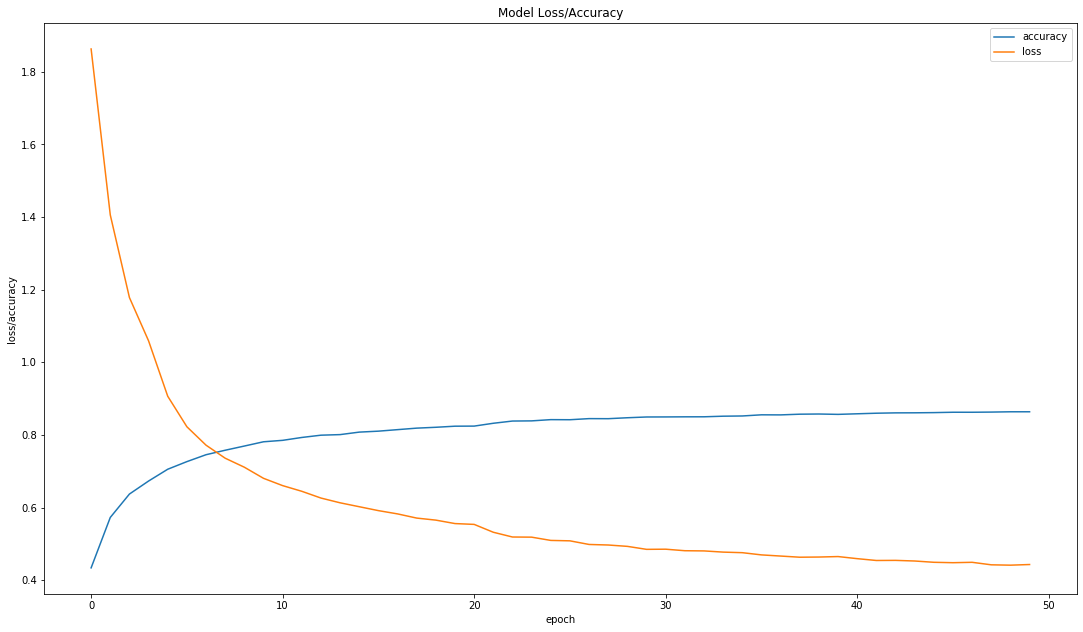

In [21]:
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.xlabel('epoch')
plt.plot(history1.history['loss'])
plt.title('Model Loss/Accuracy')
plt.ylabel('loss/accuracy')
plt.legend(['accuracy','loss'])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('cifar10.png', dpi=100)